# APPLICATIONS OF MACHINE LEARNING TO ECONOMICS AND FINANCE

## Scikit-learn
Machine learning library in Python <br/>
<br/> **Required**
* Python (>=3.5)
* NumPy (>=1.11.0)
* SciPy (>=0.17.0)

**Reference** <br/>
* sklearn User Guide <https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model>

## Regression
The objective of a regression model is to find a **relationship** between one or more *features (independent variables)* and a *target (dependent variable)*. 

## Simple Linear Regression 簡單線性迴歸

\begin{align}
y & = \beta_0 + \beta_1 x \\
\end{align}

* $y$: target (dependent variable). This is also called a response variable.
* $x$: features (independent variables). This is also called an explanatory variable.
* $\beta_0$: the intercept. The estimated response $f(x)$ for $x = 0$
* $\beta_1$: the slope. How much does $y$ change for a one unit change in $x$

In [1]:
Image(filename = "img/slr.png", width = 800, height = 400)

NameError: name 'Image' is not defined

## Multiple Linear Regression 多線性迴歸
Linear regression with two or more features.

\begin{align}
y & = \beta_0 + \beta_1 x + ... + \beta_n x_n\\
\end{align}

## Polynomial Regression
Generalized case of linear regression.
* Including non-linear terms such as $\beta_2 x_1^2$ , $\beta_3 x_1^3$, or $\beta_4 x_1 x_2$

## Example

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data: Housing price prediction**

* Avg. Area Income': Avg. Income of residents of the city house is located in.
* Avg. Area House Age': Avg Age of Houses in same city
* Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* Area Population': Population of city house is located in
* Price': Price that the house sold at
* Address': Address for the house

In [4]:
USAhousing = pd.read_csv('/Users/vv41020tw/Downloads/USA_Housing.csv')

In [5]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
USAhousing.columns #方便資料剪下來貼上去

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

**Exploratory Data Analysis (EDA)**

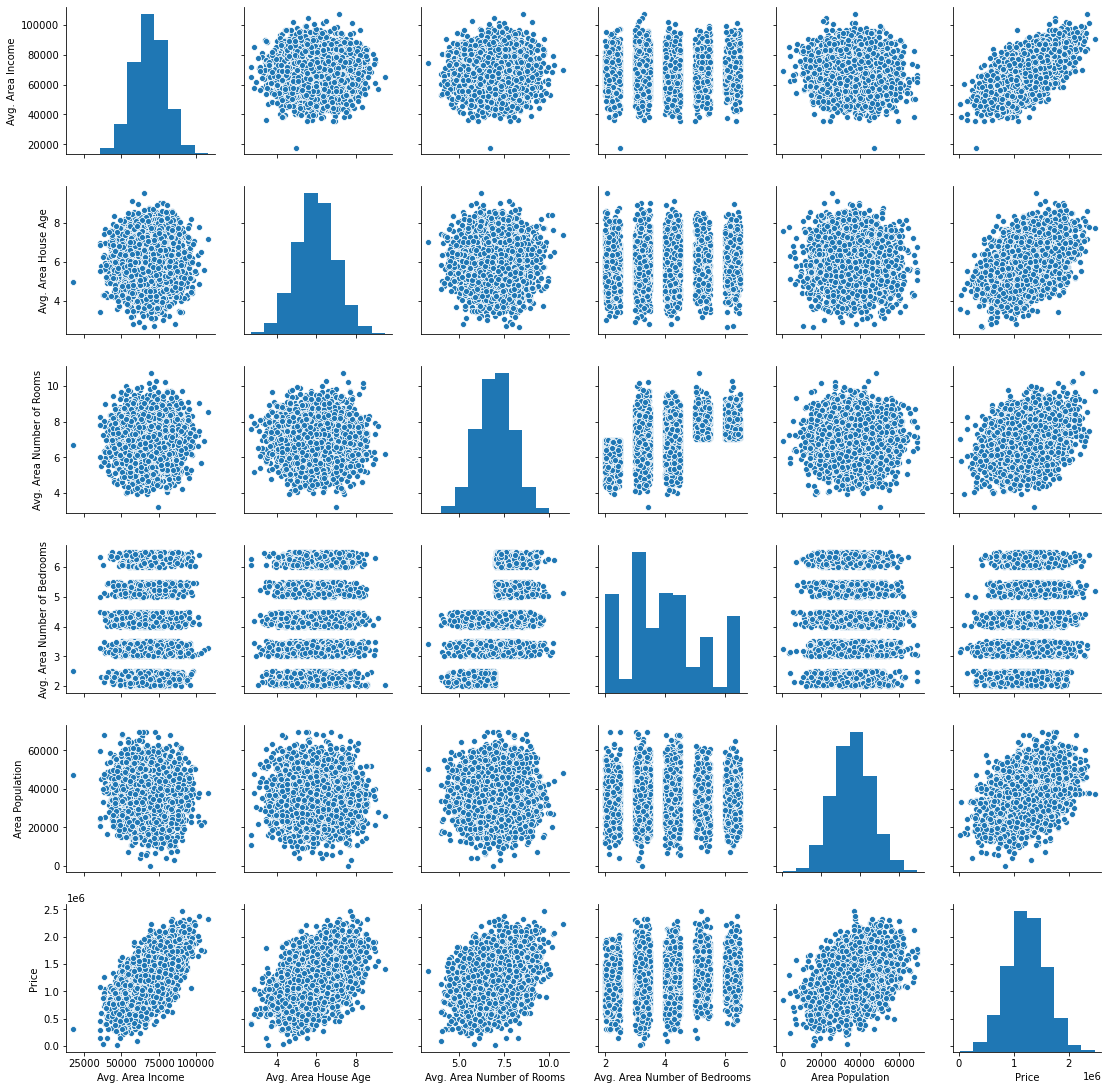

In [9]:
sns.pairplot(USAhousing)

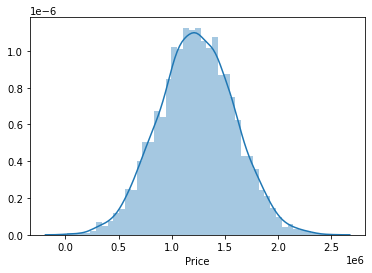

In [10]:
sns.distplot(USAhousing['Price'])

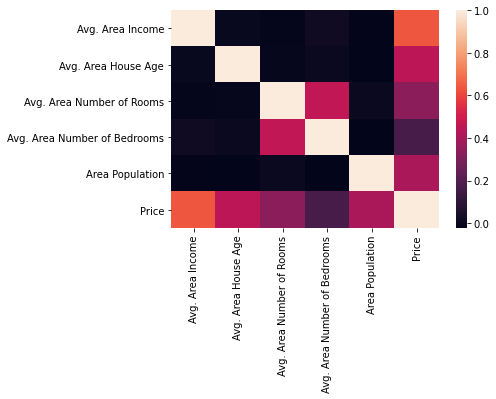

In [11]:
sns.heatmap(USAhousing.corr())

**Train Test Split**

In [12]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [81]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
#0.6拿來訓練模型、0.4拿來測試模型 random_state=101拆的方式（不一定要寫也可以）

**Train the model**

In [80]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()#將資料去名為lm

In [17]:
lm.fit(X_train,y_train)#訓練模型將資料fit進去

LinearRegression()

**Results**

In [18]:
#回歸模型為y=B0+B1X1+B2X2+.......
print(lm.intercept_)#截距項

-2640159.79685191


In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df
#price=-2640159.7968+21.52income+.........

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


**Test the model**

In [20]:
predictions = lm.predict(X_test)
#做回歸

Text(0, 0.5, 'Predicted Y')

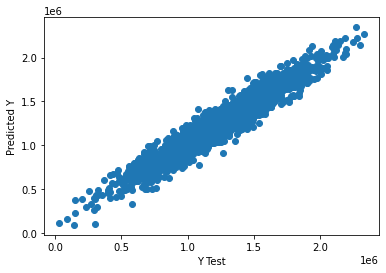

In [21]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#畫回歸圖

In [22]:
# R-square 一定是0～1因為有平方
from sklearn.metrics import mean_squared_error, r2_score
print('R-square: %.2f' % r2_score(y_test, predictions))

R-square: 0.92


## Underfitting and Overfitting

**Coefficient of Determination, denoted as R-square $R^2$** <br/>
The proportion of the total sample variability around y that is explained by the linear relationship between y and x
* range from 0 to 1

In [23]:
from IPython.display import Image 
Image(filename = "img/fit.png", width = 800, height = 400)

FileNotFoundError: [Errno 2] No such file or directory: 'img/fit.png'

### Ways to combat overfitting

1. **Use more training data** 
2. **Use regularization**

### Ways to combat underfitting

1. **Increase the size or number of parameters in the model** 
2. **Increase the complexity of the model**

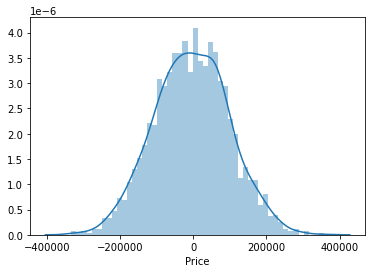

In [24]:
# Residual
sns.distplot((y_test-predictions),bins=50);

### (Advanced) Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))#MSE(error turn)越低越好
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209503
RMSE: 102278.82922291153


## Recall 
Linear function of features is one of the simplest way to predict target.

\begin{align}
y & = \beta_0 + \beta_1 x + ... + \beta_n x_n + \epsilon \\
\end{align}


\begin{align}
\hat{y} & = \beta_0 + \beta_1 x + ... + \beta_n x_n \\
\end{align}

In [27]:
from IPython.display import Image 
Image(filename = "img/variance.png", width = 600, height = 400)

FileNotFoundError: [Errno 2] No such file or directory: 'img/variance.png'

To minimize the residual (the error), the cost function can be written as

\begin{align}
\epsilon = \sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 =  \sum_{i=1}^n \left (y_i - \sum_{j=1}^m \beta_jx_{ij} \right)^2
\end{align}

A model in presence of a large number of features: <br/>
1. enhance the tendency to overfit or
2. cause computational challenges

**Ridge and Lasso regression are one of the simple techniques to reduce model complexity and prevent overfitting**

## Ridge
Put constraint on the coefficients $\beta$. The penalty term $\lambda$ regularizes the coefficients.

\begin{align}
\sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 =  \sum_{i=1}^n \left( y_i - \sum_{j=1}^m \beta_jx_{ij} \right)^2 + \lambda \sum_{j=1}^m \beta_j^2
\end{align}

For some $c > 0$, $\sum_{j=1}^m \beta_j^2 < c$

## Lasso
Also help in feature selection.

\begin{align}
\sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 =  \sum_{i=1}^n \left( y_i - \sum_{j=1}^m \beta_jx_{ij} \right)^2 + \lambda \sum_{j=1}^m  \left\lvert \beta_j \right\rvert 
\end{align}

For some $t > 0$, $\sum_{j=1}^m \left\lvert \beta_j \right\rvert < c$

## $\lambda$
$\lambda$ determines the regularization strength. $\lambda$ can take various values.

* $\lambda = 0 $ <br/>
  The objective becomes same as simple linear regression.
* $\lambda = \infty $ <br/>
  Infinite weightage makes the coefficients to be zero. 
* $0 < \lambda < \infty$ <br/>
  The magnitude of $\lambda$ will decide the weightage.

## Example

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

In [29]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [30]:
## polynomial regression
for i in range(2,16): 
    colname = 'x_%d'%i  
    data[colname] = data['x']**i

In [31]:
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


### Ridge

In [32]:
from sklearn.linear_model import Ridge#使用模型要先叫Ridge，先用sklearn.linear叫出Ridge

In [33]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.77085e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


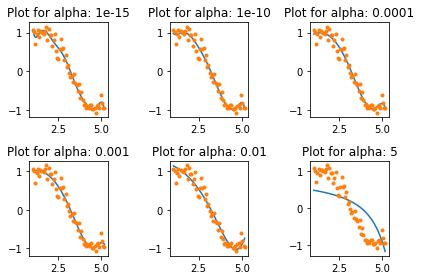

In [34]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [35]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-3e+02,3.8e+02,-2.3e+02,64,0.87,-4.5,0.46,0.18,-0.028,-0.0064,0.0011,0.00019,-5.3e-05,3.8e-06,-6.3e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


In [36]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

### Lasso

In [37]:
from sklearn.linear_model import Lasso

In [38]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4783573825903704, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47828183990567147, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47079330190414453, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(


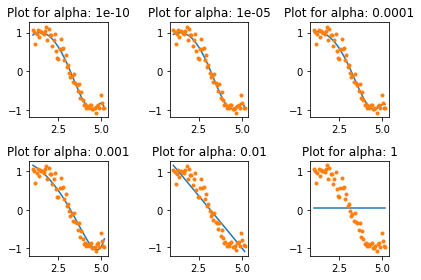

In [39]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [40]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

## Logistic Regression 
######  在這個回歸y只有0跟1兩種

What if the dependent variable has only two possible outcomes:

‘1’ for true/success; or <br/>
‘0’ for false/failure

<br/>

Logistic Regression is a supervised machine learning algorithm used in **binary classification**. Logistic Regression fits a line to a dataset and then returns the probability that a new sample belongs to one of the two classes according to its location with respect to the line. In Logistic Regression, we use the **Sigmoid function** to describe the probability that a sample belongs to one of the two classes. The shape of the Sigmoid function determines the probabilities predicted by our model. When we train our model, we are in fact attempting to select the Sigmoid function whose shape best fits our data. <br/>

**Sigmoid Function**
\begin{equation*}
\sigma(z) = \frac{1} {1+e^{-z}} = 1
\end{equation*}

**Equation for the line**
\begin{equation*}
z = \sum w_ix_i + \epsilon_i
\end{equation*}

In [41]:
from IPython.display import Image 
Image(filename = "img/linear_vs_logistic_regression_edxw03.png", width = 800, height = 800)

FileNotFoundError: [Errno 2] No such file or directory: 'img/linear_vs_logistic_regression_edxw03.png'

In [42]:
Image(filename = "img/sigmoid.png", width = 600, height = 400)

FileNotFoundError: [Errno 2] No such file or directory: 'img/sigmoid.png'

## Example

[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic)

In [43]:
train = pd.read_csv('/Users/vv41020tw/Downloads/titanic_train.csv')

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.1,NaN,S


### Missing data

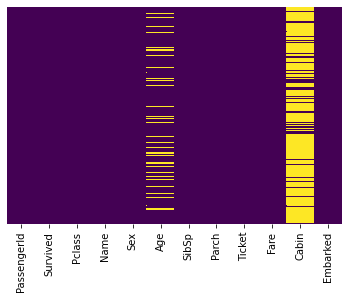

In [45]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

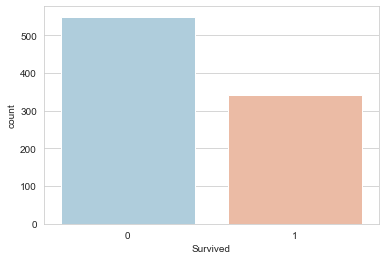

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

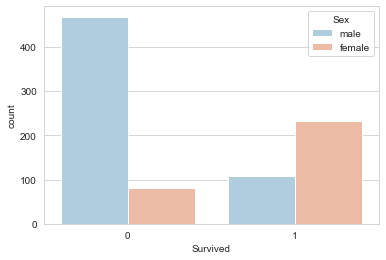

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

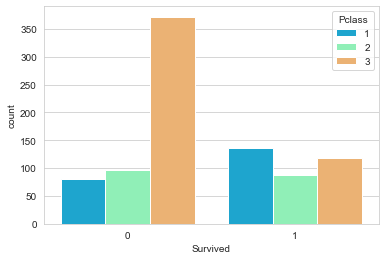

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

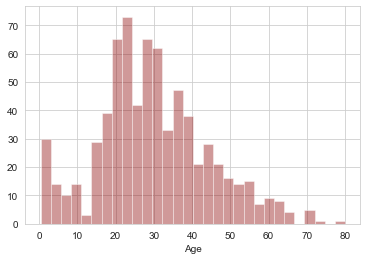

In [49]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

### Data cleaning

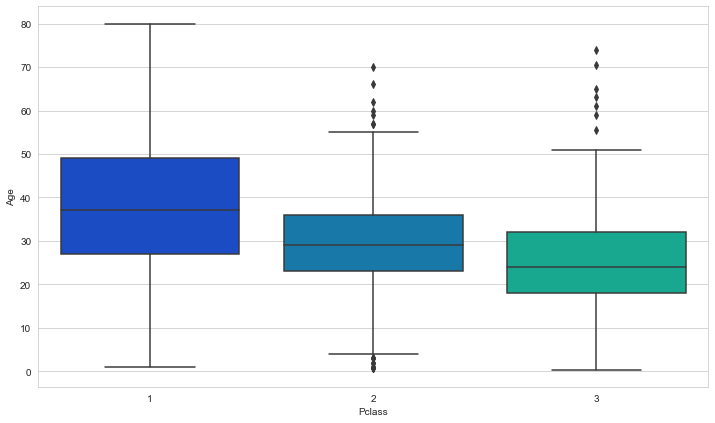

In [50]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [51]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [52]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

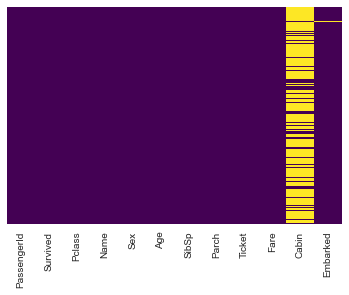

In [53]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
train.drop('Cabin',axis=1,inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.1,S


### Dummy Variable
###### 有ｎ個變數就設n-1個虛擬變數

In [56]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

train = pd.concat([train,sex,embark],axis=1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2,1,0,1
1,2,1,1,38,1,0,71,0,0,0
2,3,1,3,26,0,0,7.9,0,0,1
3,4,1,1,35,1,0,53,0,0,1
4,5,0,3,35,0,0,8.1,1,0,1


In [58]:
train1 = pd.read_csv('/Users/vv41020tw/Downloads/titanic_train.csv')

In [59]:
#alternative

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train1['Sex'] = label_encoder.fit_transform(train1['Sex'])

In [60]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.1,NaN,S


### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

# Good Job!

## Exercise

**Data**: The Ecommerce Customers csv file from the company. 

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! 

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

**Read in the Ecommerce Customers csv file as a DataFrame called customers**

In [84]:
ki = pd.read_csv('/Users/vv41020tw/Downloads/Ecommerce_Customers.csv')

In [85]:
ki.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34,13,40,4.1,5.9e+02
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,32,11,37,2.7,3.9e+02
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33,11,37,4.1,4.9e+02
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34,14,37,3.1,5.8e+02
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33,13,38,4.4,6e+02


In [86]:
ki.columns 

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

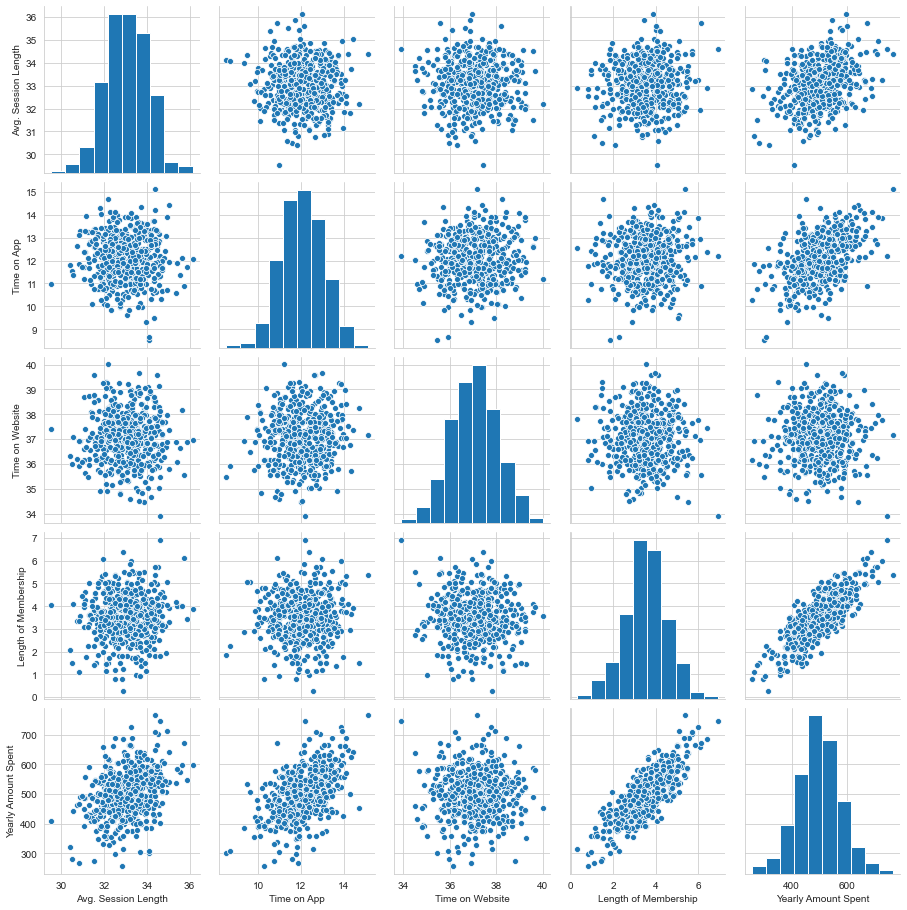

In [87]:
sns.pairplot(ki)

In [88]:
X = ki[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = ki['Yearly Amount Spent']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
#0.6拿來訓練模型、0.4拿來測試模型 random_state=101拆的方式（不一定要寫也可以）

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
ki2= LinearRegression()#將資料去名為lm

In [93]:
ki2

LinearRegression()

In [97]:
ki2.fit(X_train,y_train)#訓練模型將資料fit進去

LinearRegression()

In [98]:
#回歸模型為y=B0+B1X1+B2X2+.......
print(ki2.intercept_)#截距項

-1045.115216824574


In [101]:
ki3 = pd.DataFrame(ki2.coef_,X.columns,columns=['Coefficient'])
ki3
#price=-2640159.7968+21.52income+.........

,Coefficient
Avg. Session Length,26
Time on App,38
Time on Website,0.56
Length of Membership,62


In [102]:
predictions = ki2.predict(X_test)

Text(0, 0.5, 'Predicted Y')

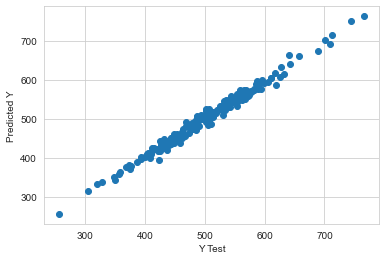

In [103]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
print('R-square: %.2f' % r2_score(y_test, predictions))

R-square: 0.99
